In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

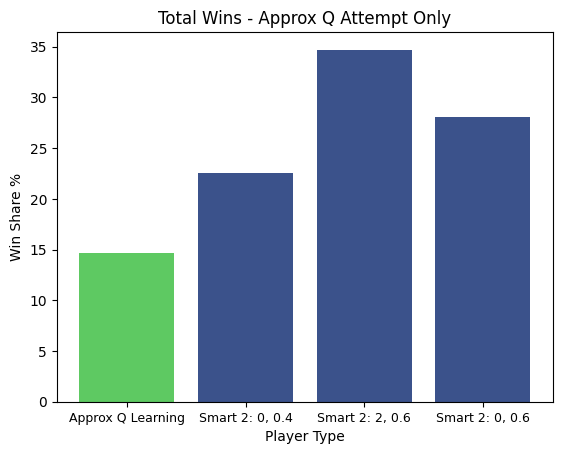

In [65]:
# Code for creating charts for the Q agent who only learns the attempt phase
# bar charts for both game outcomes and attempt outcomes

df_game = pd.read_csv("simulation_data/q_learn_approx_attempt_only/qlearn_approx_attempt_game_outcomes.csv")
df_game = df_game.groupby('player')[['player_type']].value_counts().reset_index(name='count')
fig, ax = plt.subplots()

#green "#5ec962"
#blue "#3b528b"

df_game["Win Share %"] = df_game["count"] / 10
df_game['player_type'] = df_game['player_type'].str.title()

bar_colors = ["#5ec962", "#3b528b", "#3b528b", "#3b528b"]

bars = ax.bar(df_game["player_type"], df_game["Win Share %"], color=bar_colors)

ax.set_ylabel('Win Share %')
ax.set_xlabel('Player Type')
ax.tick_params(axis='x', labelsize=9)
ax.set_title('Total Wins - Approx Q Attempt Only')


plt.show()

In [76]:
df_game

,player,player_type,count,Win Share %
0,0,Approx Q Learning,147,14.7
1,1,"Smart 2: 0, 0.4",225,22.5
2,2,"Smart 2: 2, 0.6",347,34.7
3,3,"Smart 2: 0, 0.6",281,28.1


In [66]:
df = pd.read_csv("simulation_data/q_learn_approx_attempt_only/qlearn_approx_attempt_attempt_outcomes.csv", index_col=0)
df.head()

,player type,player,result
0,"smart 2: 0, 0.6",3,self lose challange
1,"smart 2: 0, 0.6",3,self lose challange
2,"smart 2: 2, 0.6",2,turned flower
3,"smart 2: 2, 0.6",2,turned flower
4,"smart 2: 2, 0.6",2,turned flower


In [67]:
df["turned"] = np.where(df["result"].isin(["turned flower", "win challange"]), "flower", "skull")
df.head()

,player type,player,result,turned
0,"smart 2: 0, 0.6",3,self lose challange,skull
1,"smart 2: 0, 0.6",3,self lose challange,skull
2,"smart 2: 2, 0.6",2,turned flower,flower
3,"smart 2: 2, 0.6",2,turned flower,flower
4,"smart 2: 2, 0.6",2,turned flower,flower


In [68]:
df_flower = df.groupby('player')[['player type', 'turned']].value_counts().reset_index(name='count')
df_flower = df_flower[["player type", "turned", "count"]]

df_flower["player type"] = df_flower["player type"].str.title()

df_flower_pivot = df_flower.pivot_table(index="player type", 
                             columns="turned", 
                             values="count", 
                             aggfunc="sum", 
                             fill_value=0)

df_flower_pivot


turned,flower,skull
player type,,
Approx Q Learning,7908,3620
"Smart 2: 0, 0.4",3904,3210
"Smart 2: 0, 0.6",2810,2251
"Smart 2: 2, 0.6",3230,1852


In [69]:
df_flower_pivot["flower_percentage"] = df_flower_pivot["flower"] / (df_flower_pivot["flower"] + df_flower_pivot["skull"])
df_flower_pivot

turned,flower,skull,flower_percentage
player type,,,
Approx Q Learning,7908,3620,0.685982
"Smart 2: 0, 0.4",3904,3210,0.548777
"Smart 2: 0, 0.6",2810,2251,0.555226
"Smart 2: 2, 0.6",3230,1852,0.635577


In [70]:
df_flower_pivot = df_flower_pivot[["flower_percentage"]].reset_index()

In [71]:
df_flower_pivot["flower_percentage"] = df_flower_pivot["flower_percentage"] * 100

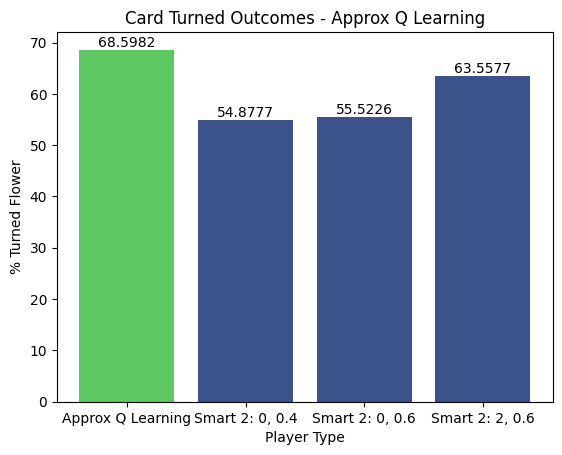

In [72]:
fig, ax = plt.subplots()

#green "#5ec962"
#blue "#3b528b"

bar_colors = ["#5ec962", "#3b528b", "#3b528b", "#3b528b"]

bars = ax.bar(df_flower_pivot["player type"], df_flower_pivot["flower_percentage"], label=df_flower_pivot["player type"], color=bar_colors)

ax.set_ylabel('% Turned Flower')
ax.set_xlabel('Player Type')
ax.set_title('Card Turned Outcomes - Approx Q Learning')

ax.bar_label(bars)

plt.show()

In [73]:
turned_counts =  df.groupby('player')[['player type', 'turned']].value_counts().reset_index(name='Count')
turned_counts

,player,player type,turned,Count
0,0,approx q learning,flower,7908
1,0,approx q learning,skull,3620
2,1,"smart 2: 0, 0.4",flower,3904
3,1,"smart 2: 0, 0.4",skull,3210
4,2,"smart 2: 2, 0.6",flower,3230
5,2,"smart 2: 2, 0.6",skull,1852
6,3,"smart 2: 0, 0.6",flower,2810
7,3,"smart 2: 0, 0.6",skull,2251


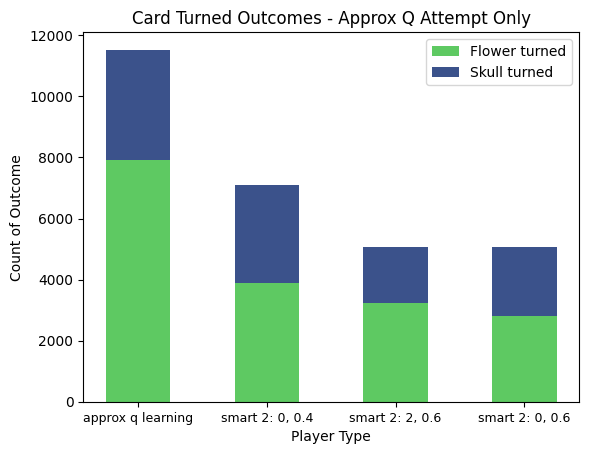

In [74]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

player_types = (
    "approx q learning",
    "smart 2: 0, 0.4",
    "smart 2: 2, 0.6",
    "smart 2: 0, 0.6"
)

turned_counts = {
    "Flower turned" :turned_counts[turned_counts["turned"] == "flower"]["Count"],
    "Skull turned" :turned_counts[turned_counts["turned"] == "skull"]["Count"]
}

colors = {
    "Flower turned": "#5ec962",  
    "Skull turned": "#3b528b"  
}

for boolean, turned_count in turned_counts.items():
    p = ax.bar(player_types, turned_count, width, label=boolean, bottom=bottom, color=colors[boolean])
    bottom += turned_count

ax.set_title("Card Turned Outcomes - Approx Q Attempt Only")
ax.set_ylabel('Count of Outcome')
ax.set_xlabel('Player Type')
ax.legend(loc="upper right")
ax.tick_params(axis='x', labelsize=9)

plt.show()